## Prediction of Meningioma Grade

- In this project, we aim to build machine learning classification models to predict the grade of meningioma (brain tumor) in patients using extracted features from MRI radiomics.
- These features are obtained from MRI scans collected from The Cancer Imaging Archive (TCIA), available at https://www.cancerimagingarchive.net/collection/meningioma-seg-class/ under a restricted license agreement.
- There are 94 patients present in the dataset who are diagnosed with either grade I or II meningioma.

### Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#pda">Preliminary Data Analysis</a></li>
<li><a href="#data std">Data Standardization</a></li>
<li><a href="#feat_select">Feature Selection</a></li>
<li><a href="#model_train">Model Training and Evaluation</a></li>
<li><a href="#model_imp">Model Improvement - Hyperparameter Tuning</a></li>
<li><a href="#model_reeval">Re-evaluation of tuned models</a></li>
<li><a href="#model_comp">Comparing Models Performance</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>

## Introduction

- According to World Health Organization, meningioma is classified into grades I, II, or III, with grade I being benign, grade II atypical, and grade III anaplastic.
- Early and complete resection of the high grade meningioma lesions is necessary due to their aggressive behaviour and high recurrence rate.
- Radiomics combined with machine learning, has shown promise in the development of predictive models for meningioma grade. Hence, this project aim to develop a classification model for meningioma grade using the available dataset from TCIA

<a id='pda'></a>

## Preliminary Data Analysis

In this section, we will explore the dataset to derive some insights into the relationship between features. 

In [1]:
# import required libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load and read dataset
df = pd.read_csv("Dataset _01.csv")

# display some few rows of the dataset
df.head()

,Subjects,Grade,original_firstorder_Skewness_t1c,original_glrlm_HighGrayLevelRunEmphasis_t1c,wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLH_firstorder_Mean_t1c,wavelet-HLH_glszm_ZoneEntropy_t1c,wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c,...,original_glrlm_ShortRunHighGrayLevelEmphasis_t2f,wavelet-LHH_glszm_GrayLevelVariance_t2f,wavelet-LHH_glszm_SmallAreaEmphasis_t2f,wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_RunEntropy_t2f,wavelet-LLH_glrlm_RunEntropy_t2f,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-LLH_gldm_SmallDependenceEmphasis_t2f
0,Meningioma-SEG-CLASS-001,1,-0.202380,1.000000,0.500000,0.781250,0.625000,0.035199,1.584963,3.000000,...,0.183386,0.222222,0.333336,7.258789,15.252757,16.975874,2.819105,3.283991,6.025921,0.009225
1,Meningioma-SEG-CLASS-002,1,0.078198,3.998177,0.644970,0.792388,0.591837,0.002975,2.521641,2.384615,...,0.412566,0.213018,0.655983,12.879417,42.543773,35.485714,3.372202,3.737664,10.480360,0.005394
2,Meningioma-SEG-CLASS-003,0,-1.122465,3.970686,0.749135,0.755102,0.745000,0.005018,1.548795,2.500000,...,0.580900,0.245556,0.600261,9.280669,31.384120,25.073600,3.179709,3.700225,7.322684,0.005692
3,Meningioma-SEG-CLASS-004,0,-0.559125,3.970544,0.537190,0.531250,0.820000,-0.029598,2.324863,2.800000,...,0.163532,0.225922,0.505917,9.889856,29.793151,27.326205,3.308140,3.773040,8.183365,0.005711
4,Meningioma-SEG-CLASS-005,0,-0.854174,1.000000,0.739645,0.501730,0.755102,0.003390,2.128085,3.250000,...,0.505990,0.242215,0.590278,11.860141,36.602601,23.996250,3.482922,3.825040,7.443554,0.004615


In [3]:
# check the number of features and samples

print("No of features: ", df.shape[1])
print("No of samples: ", df.shape[0])

No of features:  50
No of samples:  94


In [4]:
# descriptive statistics of the data

df.describe()

,Grade,original_firstorder_Skewness_t1c,original_glrlm_HighGrayLevelRunEmphasis_t1c,wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLH_firstorder_Mean_t1c,wavelet-HLH_glszm_ZoneEntropy_t1c,wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c,wavelet-HHH_firstorder_Skewness_t1c,...,original_glrlm_ShortRunHighGrayLevelEmphasis_t2f,wavelet-LHH_glszm_GrayLevelVariance_t2f,wavelet-LHH_glszm_SmallAreaEmphasis_t2f,wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_RunEntropy_t2f,wavelet-LLH_glrlm_RunEntropy_t2f,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-LLH_gldm_SmallDependenceEmphasis_t2f
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.436170,-0.243500,2.899225,0.635435,0.623576,0.632099,0.002783,2.236178,2.489702,-0.065559,...,0.356015,0.232594,5.356573e-01,9.128278,29.574805,25.864903,3.188343,3.578411,7.785921,0.006517
std,0.498568,0.768804,1.438076,0.115019,0.107621,0.103743,0.007713,0.622811,0.411192,0.123249,...,0.218767,0.020321,1.701179e-01,2.654790,8.857305,7.693632,0.211179,0.216781,2.047935,0.001778
min,0.000000,-2.052332,1.000000,0.500000,0.500000,0.500000,-0.029598,1.000000,1.500000,-0.449264,...,0.090007,0.160000,7.650000e-08,2.404321,9.727375,11.357795,2.469126,2.652987,3.624379,0.004615
25%,0.000000,-0.774200,1.000000,0.535693,0.531336,0.537190,0.000156,1.849679,2.206818,-0.118660,...,0.148213,0.222222,4.542996e-01,7.289214,22.739840,20.538101,3.042866,3.472482,6.271558,0.005493
50%,0.000000,-0.243948,3.972175,0.618594,0.603306,0.623032,0.001359,2.250101,2.500000,-0.049542,...,0.345379,0.240000,5.874852e-01,9.458491,31.323187,25.725575,3.247389,3.613757,7.618922,0.005912
75%,1.000000,0.178430,3.994126,0.719002,0.702479,0.708371,0.003247,2.571382,2.795946,0.001109,...,0.498012,0.248106,6.493523e-01,10.430441,34.985642,30.404355,3.340362,3.722113,9.105742,0.006939
max,1.000000,2.244620,3.999413,0.950033,0.905000,0.871581,0.037356,4.478859,3.500000,0.335625,...,1.000336,0.250000,7.897026e-01,15.224847,51.529881,48.882039,3.504120,3.973320,13.499614,0.016829


In [5]:
# checking for data types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 50 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Subjects                                                94 non-null     object 
 1   Grade                                                   94 non-null     int64  
 2   original_firstorder_Skewness_t1c                        94 non-null     float64
 3   original_glrlm_HighGrayLevelRunEmphasis_t1c             94 non-null     float64
 4   wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64
 5   wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64
 6   wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64
 7   wavelet-HLH_firstorder_Mean_t1c                         94 non-null     float64
 8   wavelet-HLH_glszm_ZoneEntropy_t1c         

The data contain an extraneous column "subject" which serves as the identity of the patient. This is not needed for our model and therefore will be dropped. Also, the variable "Grade" will be converted to categorical since it is the target variable.

There are no missing values.

In [6]:
# convert grade variable to category
df["Grade"] = df["Grade"].astype("category")

# remove the subject column
df.drop("Subjects", inplace=True, axis=1)

In [7]:
# display the data information to observe the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 49 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Grade                                                   94 non-null     category
 1   original_firstorder_Skewness_t1c                        94 non-null     float64 
 2   original_glrlm_HighGrayLevelRunEmphasis_t1c             94 non-null     float64 
 3   wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64 
 4   wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64 
 5   wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64 
 6   wavelet-HLH_firstorder_Mean_t1c                         94 non-null     float64 
 7   wavelet-HLH_glszm_ZoneEntropy_t1c                       94 non-null     float64 
 8   wavelet-HHL_glszm_HighGrayLevelZ

In [8]:
# count the number of subjects that belong to each grade of meningioma

df['Grade'].value_counts()

Grade
0    53
1    41
Name: count, dtype: int64

#### Correlational Analysis of Features

Here, we will examine the relationship between the features of the dataset.

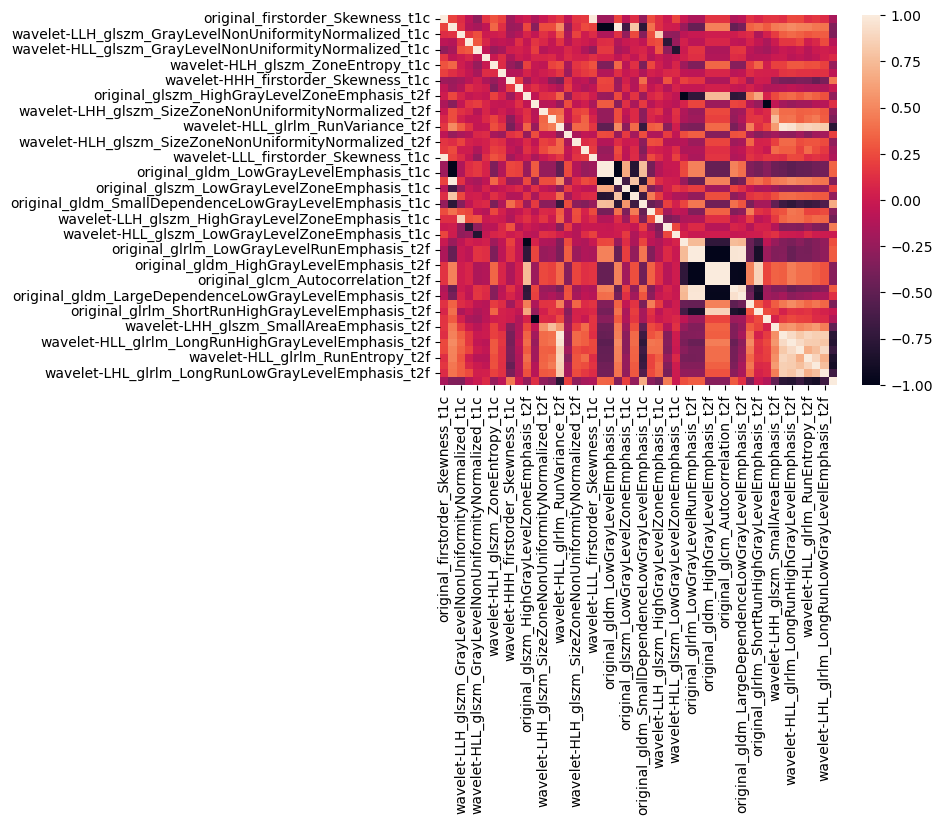

In [9]:
# choose the columns for correlational analysis by excluding the target column since it is categorical
cols = [col for col in df.columns[1:]]

# obtain the correlation coefficients between the features
df_corr = df[cols].corr()

# visualize the heatmap of the correlation
sns.heatmap(df_corr)
plt.show();

Due to the large features present in the dataset, not all the features can be visualized. Also, the heatmap is difficult to read and interpret. 

Therefore, we will restrict the correlation matrix to the top correlated pairs.

In [10]:
# Retain upper triangular values of correlation matrix 
upper_corr_mat = df[cols].corr().where( 
    np.triu(np.ones(df[cols].corr().shape), k=1).astype(np.bool_)) 
  
# Convert to 1-D series and drop Null values 
unique_corr_pairs = upper_corr_mat.unstack().dropna() 
  
# Sort correlation pairs 
sorted_corr = unique_corr_pairs.sort_values() 
sorted_corr

wavelet-LHH_glszm_GrayLevelVariance_t2f      wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f   -1.000000
original_glszm_LowGrayLevelZoneEmphasis_t2f  original_glszm_HighGrayLevelZoneEmphasis_t2f             -1.000000
original_glrlm_LowGrayLevelRunEmphasis_t1c   original_glrlm_HighGrayLevelRunEmphasis_t1c              -1.000000
original_gldm_HighGrayLevelEmphasis_t2f      original_gldm_LowGrayLevelEmphasis_t2f                   -1.000000
original_glcm_Autocorrelation_t2f            original_gldm_LowGrayLevelEmphasis_t2f                   -1.000000
                                                                                                         ...   
original_glcm_Autocorrelation_t1c            original_glrlm_HighGrayLevelRunEmphasis_t1c               0.999746
original_gldm_LowGrayLevelEmphasis_t2f       original_glrlm_LowGrayLevelRunEmphasis_t2f                0.999930
original_glcm_JointAverage_t2f               original_gldm_HighGrayLevelEmphasis_t2f                   1

The output shown sort the correlational pairs. The first 5 rows contain the most negatively correlated pairs while the last 5 rows contain the most positively correlated pairs.

We will visualize the 4 most correlated positive and negative correlational pairs using regression plot

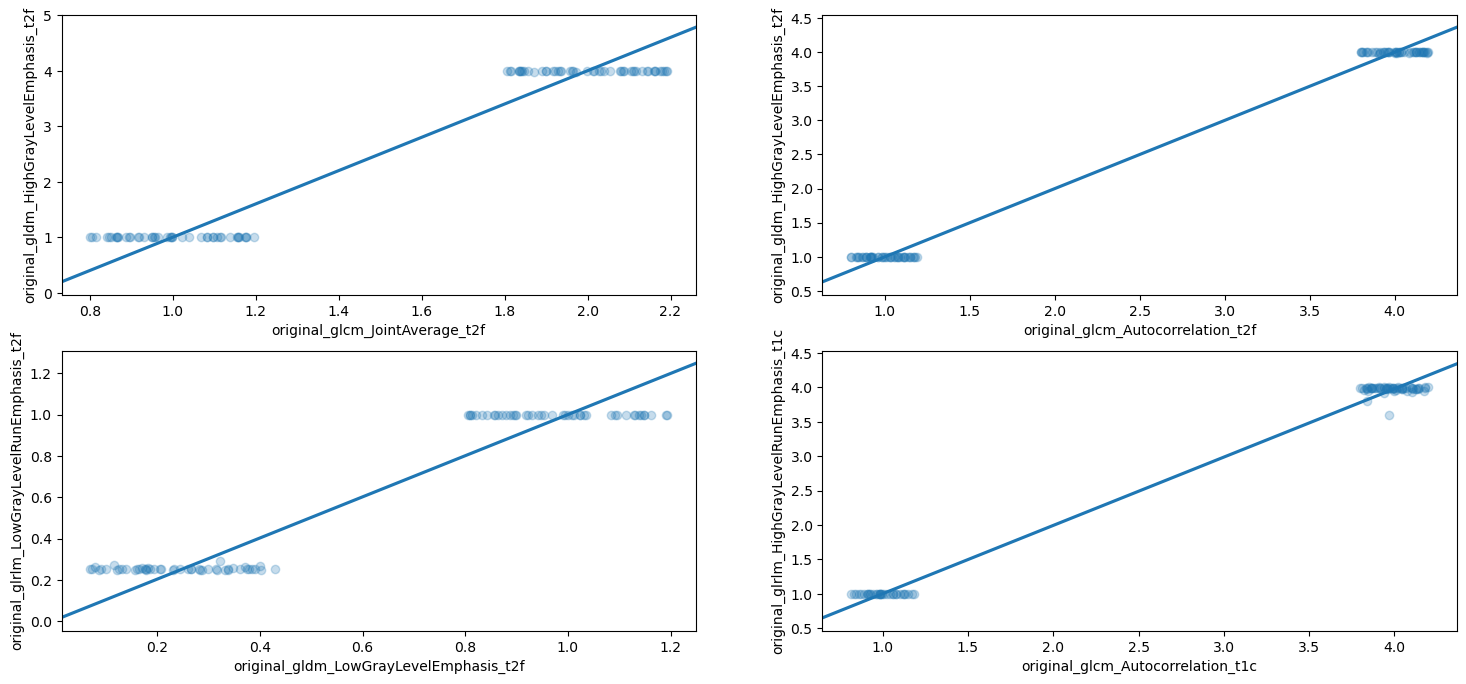

In [11]:
# four most correlated positive pairs

plt.figure(figsize=[18, 8])

plt.subplot(2, 2, 1)
sns.regplot(data = df, x = 'original_glcm_JointAverage_t2f', y = 'original_gldm_HighGrayLevelEmphasis_t2f',
               truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/4})

plt.subplot(2, 2, 2)
sns.regplot(data = df, x = 'original_glcm_Autocorrelation_t2f', y = 'original_gldm_HighGrayLevelEmphasis_t2f',
               truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/4})

plt.subplot(2, 2, 3)
sns.regplot(data = df, x = 'original_gldm_LowGrayLevelEmphasis_t2f', y = 'original_glrlm_LowGrayLevelRunEmphasis_t2f',
               truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/4})

plt.subplot(2, 2, 4)
sns.regplot(data = df, x = 'original_glcm_Autocorrelation_t1c', y = 'original_glrlm_HighGrayLevelRunEmphasis_t1c',
               truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/4});

The positive trend in the plots shows a positive relationship between the two features in concern. Although the data points are not scatter throughout the whole plot, it's evident that as the value of one feature increased, the value of other value also increased.

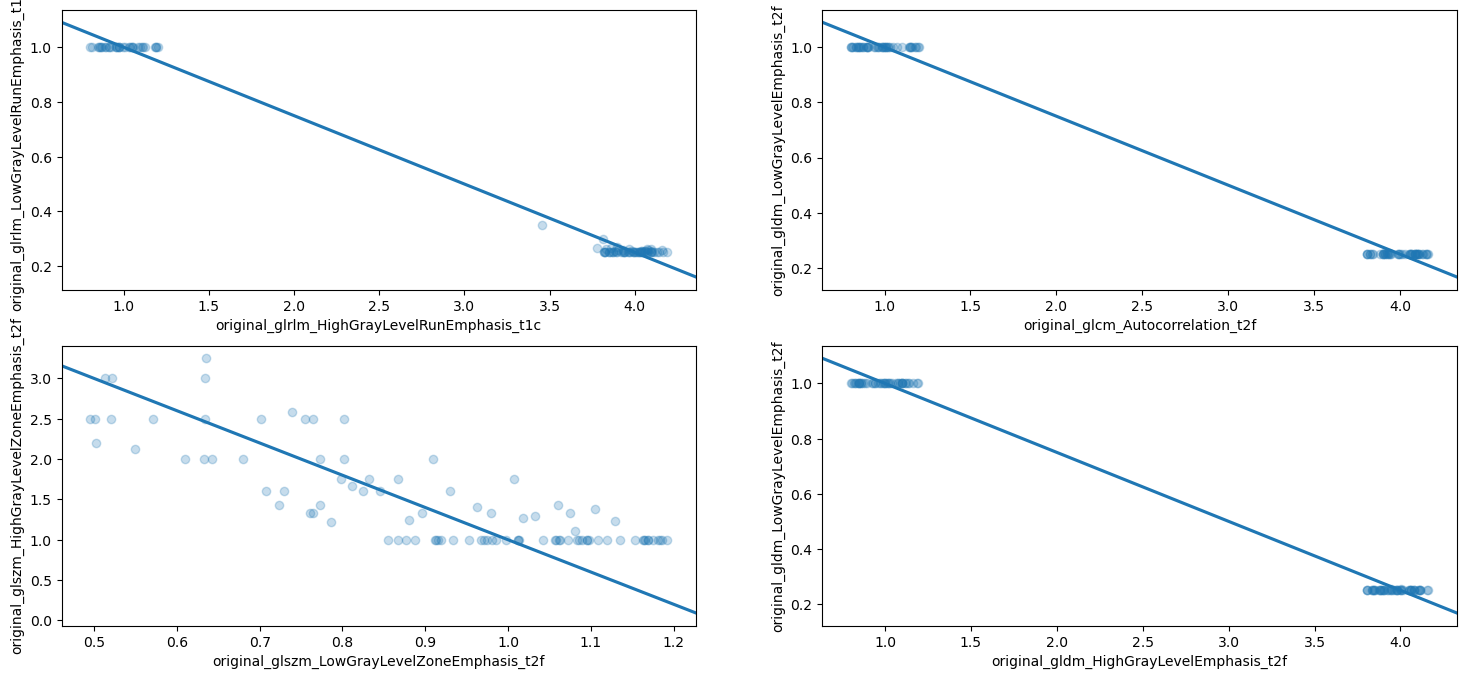

In [12]:
# relationship between negatively related features
# four most correlated negative features

plt.figure(figsize=[18, 8])

plt.subplot(2, 2, 1)
sns.regplot(data = df, x = 'original_glrlm_HighGrayLevelRunEmphasis_t1c', y = 'original_glrlm_LowGrayLevelRunEmphasis_t1c',
               truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/4})

plt.subplot(2, 2, 2)
sns.regplot(data = df, x = 'original_glcm_Autocorrelation_t2f', y = 'original_gldm_LowGrayLevelEmphasis_t2f',
               truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/4})

plt.subplot(2, 2, 3)
sns.regplot(data = df, x = 'original_glszm_LowGrayLevelZoneEmphasis_t2f', y = 'original_glszm_HighGrayLevelZoneEmphasis_t2f',
               truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/4})
plt.subplot(2, 2, 4)
sns.regplot(data = df, x = 'original_gldm_HighGrayLevelEmphasis_t2f', y = 'original_gldm_LowGrayLevelEmphasis_t2f',
               truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/4});

In contrast to what was observed in poitively related features, negatively related features show a negative trend in their relationship. As one feature increase in magnitude, the other feature tends to become smaller and vice versa.

#### Visualization of the variation in features between the two groups of Meningioma patients

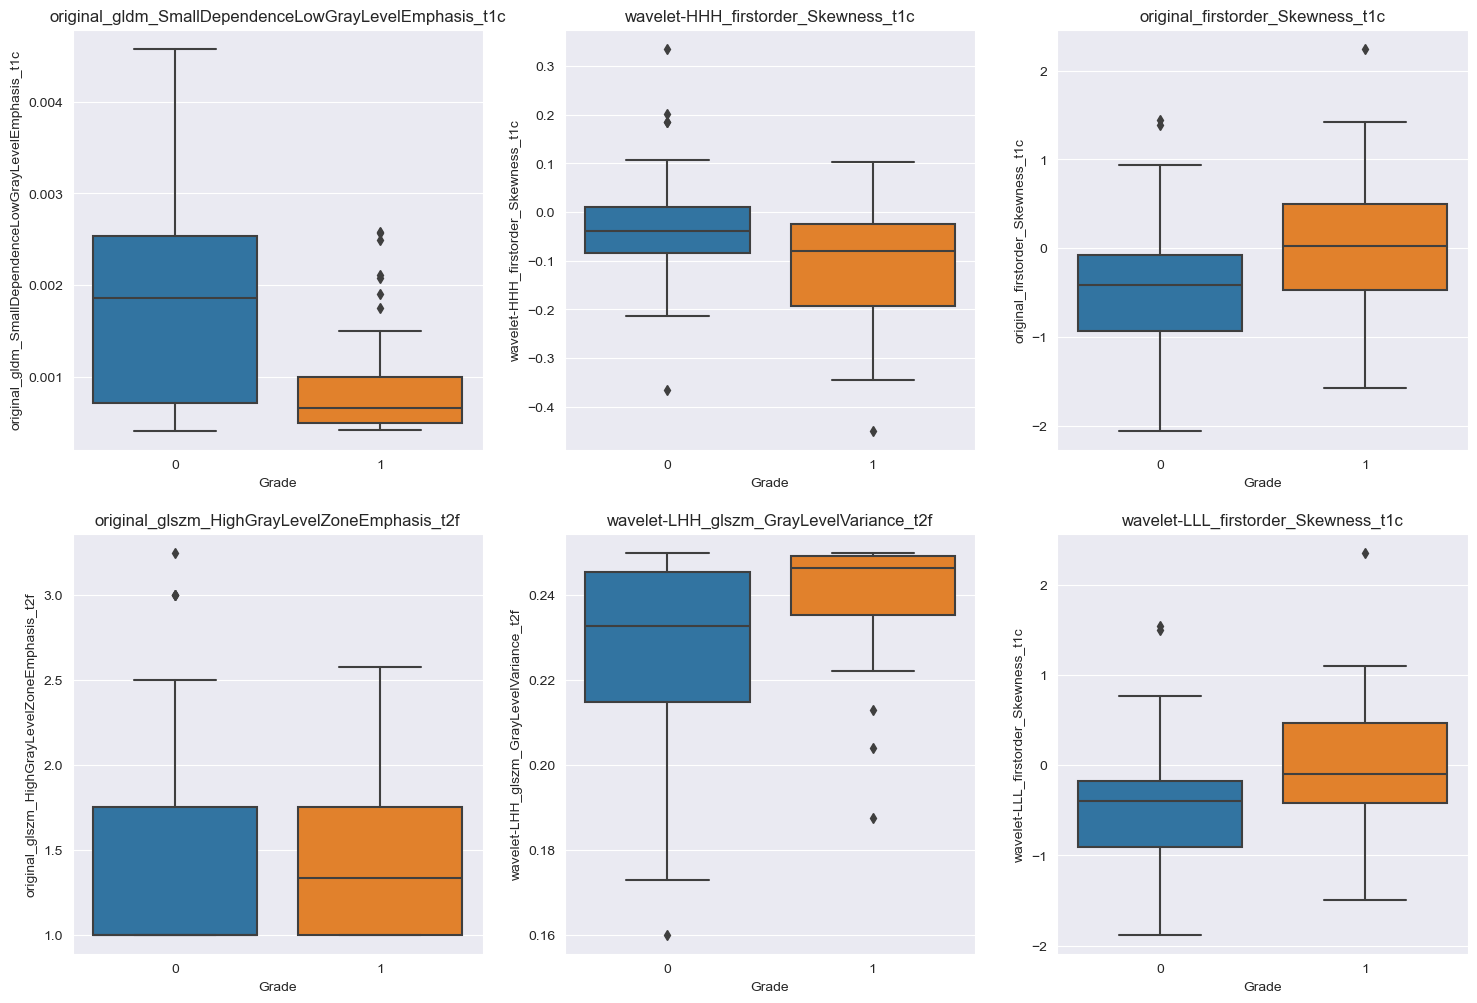

In [13]:
# set figure for the plots
plt.figure(figsize=[18, 12])
sns.set_style("darkgrid")

plt.subplot(2, 3, 1)
sns.boxplot(data = df, x = "Grade", y = 'original_gldm_SmallDependenceLowGrayLevelEmphasis_t1c')
plt.title("original_gldm_SmallDependenceLowGrayLevelEmphasis_t1c")

plt.subplot(2, 3, 2)
sns.boxplot(data = df, x = "Grade", y = 'wavelet-HHH_firstorder_Skewness_t1c')
plt.title("wavelet-HHH_firstorder_Skewness_t1c")

plt.subplot(2, 3, 3)
sns.boxplot(data = df, x = "Grade", y = 'original_firstorder_Skewness_t1c')
plt.title("original_firstorder_Skewness_t1c")

plt.subplot(2, 3, 4)
sns.boxplot(data = df, x = "Grade", y = 'original_glszm_HighGrayLevelZoneEmphasis_t2f')
plt.title("original_glszm_HighGrayLevelZoneEmphasis_t2f")

plt.subplot(2, 3, 5)
sns.boxplot(data = df, x = "Grade", y = 'wavelet-LHH_glszm_GrayLevelVariance_t2f')
plt.title("wavelet-LHH_glszm_GrayLevelVariance_t2f")

plt.subplot(2, 3,6)
sns.boxplot(data = df, x = "Grade", y = 'wavelet-LLL_firstorder_Skewness_t1c')
plt.title("wavelet-LLL_firstorder_Skewness_t1c");

The variation in the mean value of radiomic features between the two groups of meningioma patients is evident from the plot above. Although due to the large number of features, only 6 features are used for comparison. 

### Outlier Detection

The boxplots shown in the output above revealed that here are outliers in the dataset. The outliers present in the data features might be due to measurement error, and also it might be natural and normal. However, handling these outliers in the case of this projecrequire careful consideration. 

- First, the dataset is small and removing the outliers will leave us with a smaller dataset to train our model which is not appropriate.
- Secondly, the dataset used in this project is colleted using medical imaging. Therefore, we will treat all values as natural as removal of outliers can mask the purpose of the dataset.

<a id='data std'></a>
## Data Standardization


Data standardization is a preprocessing technique which invloves adjusting the values of features or variables in a dataset to a uniform scale. This is important to ensure each feature's equal contribution to the model and to avoid domination by features with larger values.

Here, we will make use of StandardScaler from the sklearn module to standardized the dataset features.

In [14]:
# import StandardScaler and scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # create an instance of the standard scaler object

df_s = scaler.fit_transform(df[df.columns[1:]]) # fit and transform scaler on numeric features of the data
df_s = pd.DataFrame(df_s, columns=df.columns[1:])

df_s.head() # display the head of the scaled data

,original_firstorder_Skewness_t1c,original_glrlm_HighGrayLevelRunEmphasis_t1c,wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLH_firstorder_Mean_t1c,wavelet-HLH_glszm_ZoneEntropy_t1c,wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c,wavelet-HHH_firstorder_Skewness_t1c,wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c,...,original_glrlm_ShortRunHighGrayLevelEmphasis_t2f,wavelet-LHH_glszm_GrayLevelVariance_t2f,wavelet-LHH_glszm_SmallAreaEmphasis_t2f,wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_RunEntropy_t2f,wavelet-LLH_glrlm_RunEntropy_t2f,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-LLH_gldm_SmallDependenceEmphasis_t2f
0,0.053772,-1.327752,-1.183809,1.472938,-0.068798,4.225206,-1.051214,1.247674,-0.096335,1.032770,...,-0.793332,-0.513114,-1.195679,-0.707971,-1.625646,-1.161570,-1.757838,-1.365426,-0.864011,1.531483
1,0.420683,0.768279,0.083350,1.576982,-0.390179,0.025080,0.460804,-0.256936,-0.925351,-0.322243,...,0.259888,-0.968491,0.711100,1.420546,1.472062,1.257195,0.875300,0.738565,1.322740,-0.635211
2,-1.149419,0.749060,0.993833,1.228673,1.094106,0.291318,-1.109596,0.025178,0.183125,0.016511,...,1.033479,0.641268,0.381793,0.057710,0.205369,-0.103403,-0.041108,0.564933,-0.227410,-0.466642
3,-0.412742,0.748962,-0.858737,-0.862474,1.820921,-4.220670,0.143159,0.758676,0.433273,-0.999749,...,-0.884569,-0.330097,-0.175758,0.288408,0.024784,0.190955,0.570318,0.902625,0.195111,-0.455680
4,-0.798576,-1.327752,0.910883,-1.138239,1.192003,0.079204,-0.174487,1.858922,0.082901,1.032770,...,0.689224,0.475976,0.322796,1.034549,0.797701,-0.244185,1.402405,1.143785,-0.168073,-1.075730


<a id='feat_select'></a>
## Feature Selection

- Feature selection is a technique which involves selecting the best set of features to be used for training machine learning models.
- In this project, a filter based method of feature selection, ANOVA coefficients and a feature importance algorithm from random forest classifier (embedded method) will be explored.

### ANOVA Coefficients

One-way ANOVA coefficients is used as a filter method of feature selection.

In [15]:
from sklearn.feature_selection import (
    f_classif,
    SelectFpr,
    SelectKBest,
)

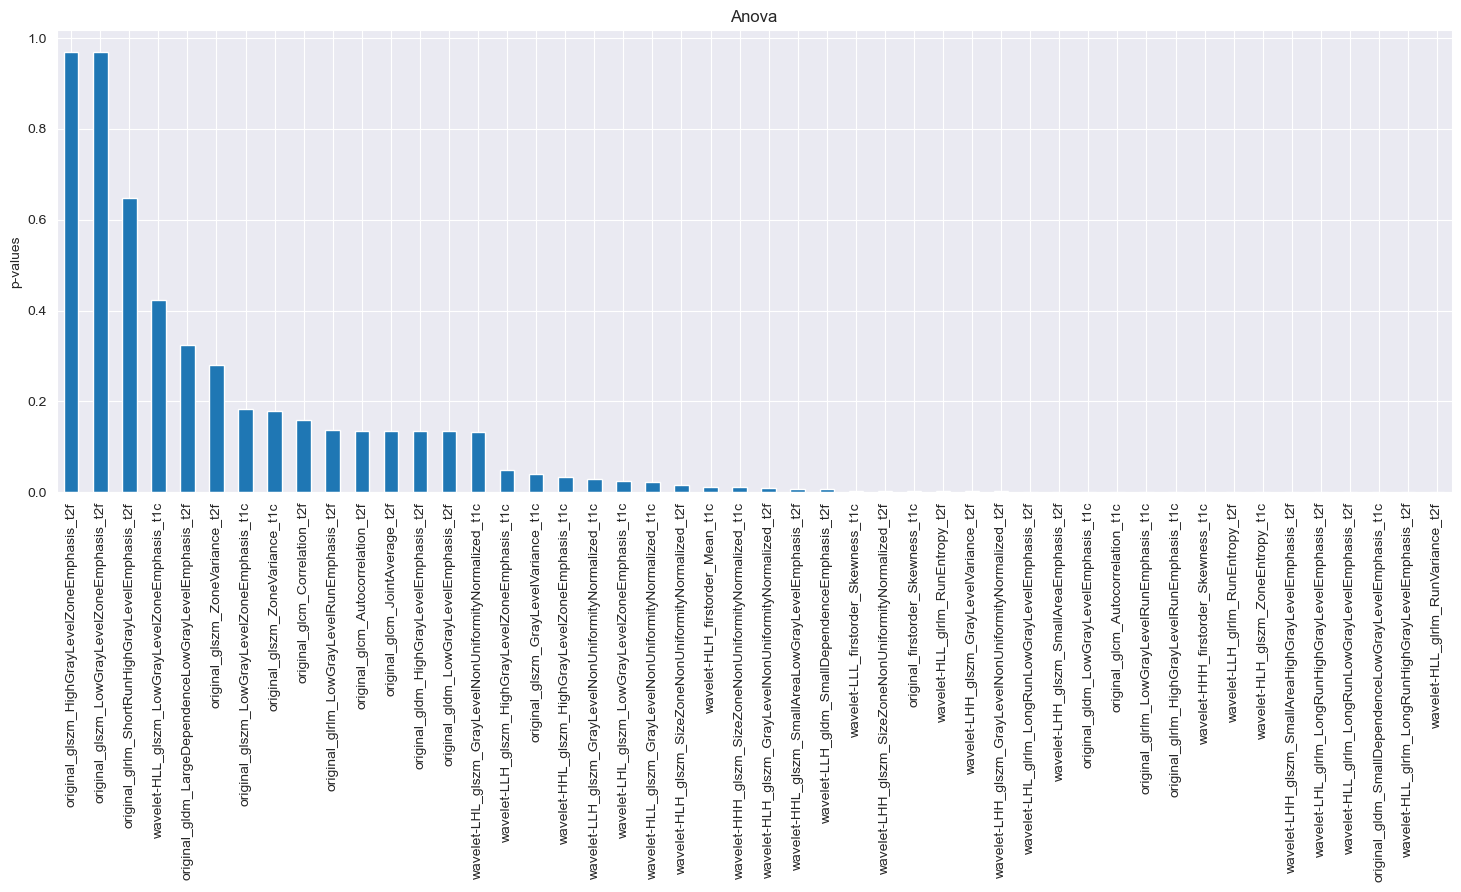

In [16]:
# select the input and target columns
features = df[cols] # features
target = df["Grade"] # the target variable

# perform one-way ANOVA for all the features:
anova_univariate = f_classif(features, target)

# obtain the p-values in a pandas series
anova_univariate = pd.Series(anova_univariate[1])
anova_univariate.index = features.columns # add the variable names in the index

# sort the features based on their p-values, and make a bar plot
anova_univariate.sort_values(ascending=False).plot.bar(figsize=(18, 6), rot=90) 
plt.ylabel("p-values")
plt.title("Anova");

- From the graph, some input features exhibit p-values below 0.05. Therefore, we conclude that there is a significant difference in the mean values of these features between grade I and grade II meningioma.
- Conversely, some features possess p-values exceeding 0.05, indicating that the mean difference fo features between the two groups of meningioma grades is not significant.

Next, we will obtain the features with p-value greater less than 0.05.

In [17]:
# obtain features with p > 0.05
sig_feats = SelectFpr(f_classif, alpha=0.05).fit(features, target)

# print the number and the list of the selected features
print("Number of selected features: ", len(features.columns[sig_feats.get_support()]))
print(features.columns[sig_feats.get_support()])

Number of selected features:  33
Index(['original_firstorder_Skewness_t1c',
       'original_glrlm_HighGrayLevelRunEmphasis_t1c',
       'wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-HLH_firstorder_Mean_t1c', 'wavelet-HLH_glszm_ZoneEntropy_t1c',
       'wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c',
       'wavelet-HHH_firstorder_Skewness_t1c',
       'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c',
       'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f',
       'wavelet-HLL_glrlm_RunVariance_t2f',
       'wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis_t2f',
       'wavelet-LLL_firstorder_Skewness_t1c',
       'original_glr

As observed, only 33 of the 48 input features are significantly related to the target column. Therefore, we will be training our model using only the selected features.

In [18]:
# store the selected features
anova_feats = features.columns[sig_feats.get_support()]

### Feature importance from decision trees

Here, we will select the most important features from decision tree based models. The importance of each feature is given by the total reduction in impurity throughout the tree.

In [19]:
# implementation of EFS
# import necessary modules

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [20]:
# select features based on their importance derived from a random forest classifier

sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=10))
sel_.fit(df_s, target)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=10))

In [21]:
# create a list with the selected features

selected_feat = df_s.columns[(sel_.get_support())]

# print the number of features and their list
print("Number of selected features:", len(selected_feat))
print(selected_feat)

Number of selected features: 20
Index(['original_firstorder_Skewness_t1c',
       'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-HLH_firstorder_Mean_t1c',
       'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c',
       'wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f',
       'wavelet-HLL_glrlm_RunVariance_t2f',
       'wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis_t1c',
       'original_glszm_ZoneVariance_t1c',
       'wavelet-LLH_glszm_HighGrayLevelZoneEmphasis_t1c',
       'wavelet-HLL_glszm_LowGrayLevelZoneEmphasis_t1c',
       'wavelet-LHH_glszm_GrayLevelVariance_t2f',
       'wavelet-LHH_glszm_SmallAreaEmphasis_t2f',
       'wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f',
       'wavelet-HLL_glrlm_RunEntropy_t2f', 'wavelet-LLH_glrlm_RunEntropy

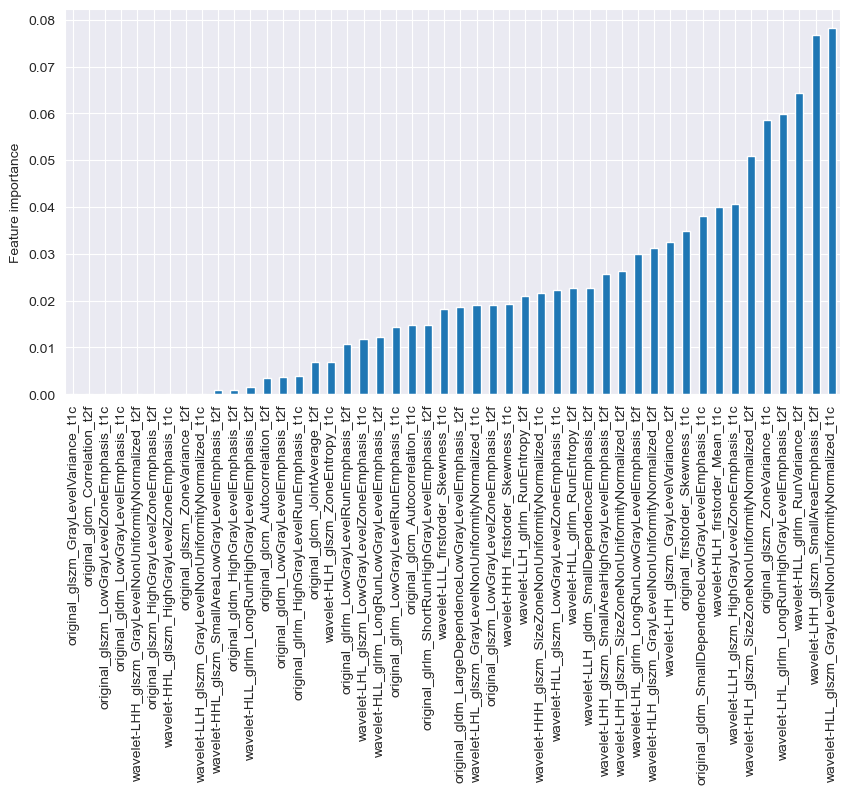

In [22]:
# plot the feature importance

pd.Series(
    sel_.estimator_.feature_importances_.ravel(),
    index=df_s.columns).sort_values().plot.bar(figsize=(10,5),
)
plt.ylabel('Feature importance')
plt.show()

The embedded method select the best features based on their improtance in predicting the model. Therefore, we will reduce the input features for our machine learning models to the slected features from the embedded method.

In [23]:
# reduce the datasets to the selected variables

emb_feats = sel_.transform(df_s)
emb_feats.shape

(94, 20)

<a id='model_train'></a>
## Model Training and Model Evaluation

### Train-test Split

- The dataset will be divided into 70% training set and 30% testing set.
- We first train our model on the training set, and then we use the testing set to evaluate the accuracy of the resulting model. 

In [24]:
# splitting dataset into training and testing sets

from sklearn.model_selection import train_test_split

# We will train the dataset using all features and compare its performance when compared to using selected features
X_train, X_test, y_train, y_test = train_test_split(df_s, target, test_size=0.30, random_state=20)

In [25]:
# checking the train and test data shape

print(X_train.shape)
print(X_test.shape)

(65, 48)
(29, 48)


### Classification Models

#### 1. Decision Tree Classifier

We will be fitting the decision tree with default hyperparameters.


In [26]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# train and fit a decision tree model
dt_model = DecisionTreeClassifier(random_state=54)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=54)

In [27]:
# Predict on the test data
y_pred = dt_model.predict(X_test)

# determine the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8275862068965517


In [28]:
# training the model using selected features from anova
X_train, X_test, y_train, y_test = train_test_split(df_s[anova_feats], target, test_size=0.30, random_state=20)

# checking the train and test data shape
print(X_train.shape)
print(X_test.shape)

(65, 33)
(29, 33)


In [29]:
# train and fit a decision tree model
dt_model = DecisionTreeClassifier(random_state=54)
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7241379310344828


In [30]:
# training the model using selected features from embedded feature selection
X_train, X_test, y_train, y_test = train_test_split(emb_feats, target, test_size=0.30, random_state=20)

# checking the train and test data shape
print(X_train.shape)
print(X_test.shape)

(65, 20)
(29, 20)


In [31]:
# train and fit a decision tree model
dt_model = DecisionTreeClassifier(random_state=54)
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6206896551724138


We can observe that even though feature selection helped in reducing the number of input variable, it also affect the accuracy of the model. The accuracy of the model increases as the number of inputed features increases. 

Therefore, we will build our model using all the features.

In [32]:
# splitting dataset into training and testing sets

from sklearn.model_selection import train_test_split

# We will train the dataset using all features and compare its performance when compared to using selected features
X_train, X_test, y_train, y_test = train_test_split(df_s, target, test_size=0.30, random_state=20)

# checking the train and test data shape
print(X_train.shape)
print(X_test.shape)

(65, 48)
(29, 48)


In [33]:
# train and fit a decision tree model
dt_model = DecisionTreeClassifier(random_state=54)
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8275862068965517


#### Confusion Matrix for Decision Tree Classifier



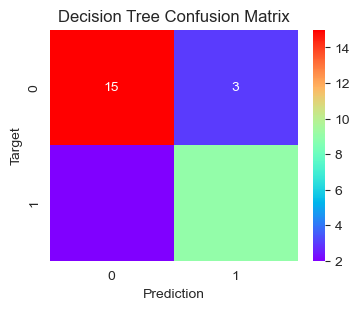

In [34]:
from sklearn.metrics import confusion_matrix

dt_cf = confusion_matrix(y_test, y_pred) # create an instance of the confusion matrix

plt.figure(figsize=(4, 3))
sns.heatmap(dt_cf, cmap="rainbow", annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Decision Tree Confusion Matrix')
plt.show();

#### Evaluation of the decision tree classifier

We will evaluate the performance of the model in terms of accuracy, sensitivity, specificity, precision, recall and AUC.

In [35]:
# obtain true and false positive and negative data point

TP = dt_cf[1,1] # true positive
TN = dt_cf[0,0] # true negative
FP = dt_cf[1,0] # False positive
FN = dt_cf[0,1] # false negative

# determine the evaluation metrics

dt_accuracy = (TP+TN)/(TP+TN+FN+FP)
dt_sensitivity = TP / (TP + FN)
dt_specificity = TN / (TN + FP)
dt_precision = TP / (TP + FP)
dt_recall = TP / (TP + FN)

#use model to predict probability that given y value is 1
pred_proba = dt_model.predict_proba(X_test)[::,1]

#calculate AUC of model
from sklearn import metrics
dt_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
dt_metrics = [{'Accuracy': dt_accuracy, 'Sensitivity': dt_sensitivity, 'Specificity': dt_specificity,
                  'Precision': dt_precision, 'Recall': dt_recall, 'AUC': dt_auc}]
dt_metrics_df = pd.DataFrame.from_dict(dt_metrics) # convert the dictionary to dataframe
dt_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.827586,0.75,0.882353,0.818182,0.75,0.825758


### 2. KNeighbors Classifier


In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier() # get instance of model
knn_clf.fit(X_train, y_train) # train/fit the model

y_pred = knn_clf.predict(X_test) # get the target predictions

accuracy = accuracy_score(y_test, y_pred) #obtain the accuracy score of the model
print("Accuracy:", accuracy)

Accuracy: 0.6896551724137931


#### Confusion Matrix for KNN 

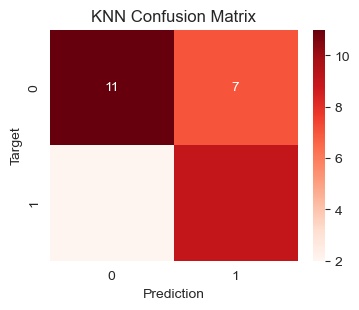

In [37]:
# generate the confusion matrix for the KNN classifier
knn_cf = confusion_matrix(y_test, y_pred)

# plot an heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(knn_cf, cmap='Reds', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('KNN Confusion Matrix');

#### Evaluation metrics of KNN Classifier

In [38]:
TP = knn_cf[1,1] # true positive
TN = knn_cf[0,0] # true negative
FP = knn_cf[1,0] # False positive
FN = knn_cf[0,1] # false negative

# determine the evaluation metrics
knn_accuracy = (TP+TN)/(TP+TN+FN+FP)
knn_sensitivity = TP / (TP + FN)
knn_specificity = TN / (TN + FP)
knn_precision = TP / (TP + FP)

#calculate AUC of model
knn_auc = metrics.roc_auc_score(y_test, y_pred)

# create a dictionary for the evaluation metrics
knn_perf = [{'Accuracy': knn_accuracy, 'Sensitivity': knn_sensitivity, 'Specificity': knn_specificity,
                  'Precision': knn_precision, 'AUC': knn_auc}]
knn_perf_df = pd.DataFrame.from_dict(knn_perf) # convert the dictionary to dataframe
knn_perf_df

,Accuracy,Sensitivity,Specificity,Precision,AUC
0,0.689655,0.5625,0.846154,0.818182,0.714646


### 3. Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

xgb_clf = GradientBoostingClassifier(random_state=10).fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8275862068965517


#### Confusion Matrix for XGB classifier

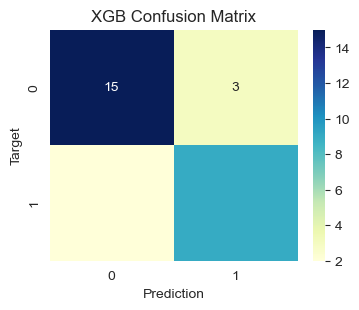

In [40]:
# confusion matrix for the XGB classifier
xgb_cf = confusion_matrix(y_test, y_pred)

# plot an heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(xgb_cf, cmap='YlGnBu', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('XGB Confusion Matrix');

#### Evaluation Metrics of XGB classifier

In [41]:
TP = xgb_cf[1,1] # true positive
TN = xgb_cf[0,0] # true negative
FP = xgb_cf[1,0] # False positive
FN = xgb_cf[0,1] # false negative

# determine the evaluation metrics
xgb_accuracy = (TP+TN)/(TP+TN+FN+FP)
xgb_sensitivity = TP / (TP + FN)
xgb_specificity = TN / (TN + FP)
xgb_precision = TP / (TP + FP)

#use model to predict probability that given y value is 1
pred_proba = xgb_clf.predict_proba(X_test)[::,1]

#calculate AUC of model
xgb_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
xgb_perf = [{'Accuracy': xgb_accuracy, 'Sensitivity': xgb_sensitivity, 'Specificity': xgb_specificity,
                  'Precision': xgb_precision, 'AUC': xgb_auc}]
xgb_perf_df = pd.DataFrame.from_dict(xgb_perf) # convert the dictionary to dataframe
xgb_perf_df

,Accuracy,Sensitivity,Specificity,Precision,AUC
0,0.827586,0.75,0.882353,0.818182,0.853535


<a id='model_imp'></a>

## Model Improvement - Hyperparameter Tuning

Hyperparameter tuning is one important technique for improving model performance. It involves finding the best parameters to train the classification models.

### Hyperparameter Tuning of Decision Tree Classifier

Decision tree has some parameters such as criterion, maximum depth, minimum samples split, maximum leaf nodes and so on. We will adjust the major parameters such a mx_leaf_nodes, max_depth, and min_samples_split to determine the best combination.

In [42]:
# define a function to plot the accuracy of the model based on max_leaf_nodes
def plot_max_leaf(max_leaf_nodes):
    model_acc = []
    for n in max_leaf_nodes:
        # train and fit a decision tree model
        dt_model = DecisionTreeClassifier(random_state=54, max_leaf_nodes=n)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_test) # Predict on the test data
        accuracy = accuracy_score(y_test, y_pred)
        model_acc.append(accuracy)
    # create dictionary for model accuracy
    dict_ = {'Max_Leaf_Node': max_leaf_nodes, 'Accuracy': model_acc} 
    df_accuracy = pd.DataFrame(dict_)

    # plot the accuracy of the model at different max leaf nodes
    plt.figure(figsize=(8, 4))
    plt.plot(df_accuracy['Max_Leaf_Node'], df_accuracy['Accuracy'], marker = '.')    
    plt.xlabel('Max Leaf node')
    plt.ylabel("Accuracy")
    plt.title("Decision tree accuracy")
    plt.show()

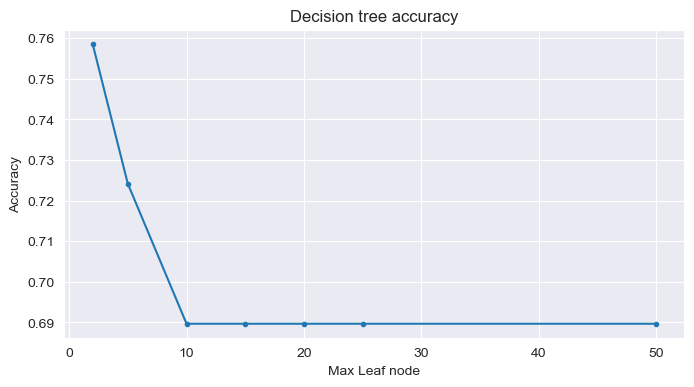

In [43]:
plot_max_leaf([2,5,10,15,20,25,50])

We can see that none of the model accuracy at different max_leaf_node is up to 0.80, meanwhile the initial model without hyperparameter tuning gave an accuracy of 0.827. Therefore, we will try to tweak other parameters of decision tree.

In [44]:
# define a function to plot the accuracy of the model based on max_depth
def plot_max_depth(max_depth):
    model_acc = []
    for n in max_depth:
        # train and fit a decision tree model
        dt_model = DecisionTreeClassifier(random_state=54, max_depth=n)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_test) # Predict on the test data
        accuracy = accuracy_score(y_test, y_pred)
        model_acc.append(accuracy)
    # create dictionary for model accuracy
    dict_ = {'max_depth': max_depth, 'Accuracy': model_acc} 
    df_accuracy = pd.DataFrame(dict_)

    # plot the accuracy of the model at different max leaf nodes
    plt.figure(figsize=(8, 4))
    plt.plot(df_accuracy['max_depth'], df_accuracy['Accuracy'], marker = '.')    
    plt.xlabel('max_depth')
    plt.ylabel("Accuracy")
    plt.title("Decision tree accuracy")
    plt.show()

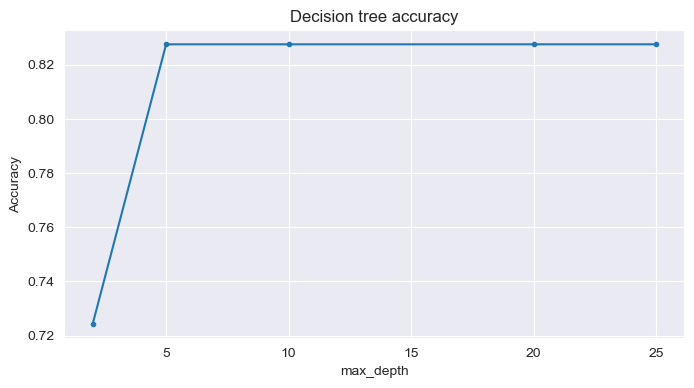

In [45]:
plot_max_depth([2, 5, 10, 20, 25])

The highest accuracy is obtained at value of max_depth >= 5

In [46]:
# define a function to plot the accuracy of the model based on min_sample_split
def plot_min_split(min_samples_split):
    model_acc = []
    for n in min_samples_split:
        # train and fit a decision tree model
        dt_model = DecisionTreeClassifier(random_state=54, min_samples_split=n)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_test) # Predict on the test data
        accuracy = accuracy_score(y_test, y_pred)
        model_acc.append(accuracy)
    # create dictionary for model accuracy
    dict_ = {'min_samples_split': min_samples_split, 'Accuracy': model_acc} 
    df_accuracy = pd.DataFrame(dict_)

    # plot the accuracy of the model at different min_samples_split
    plt.figure(figsize=(8, 4))
    plt.plot(df_accuracy['min_samples_split'], df_accuracy['Accuracy'], marker = '.')    
    plt.xlabel('min_samples_split')
    plt.ylabel("Accuracy")
    plt.title("Decision tree accuracy")
    plt.show()

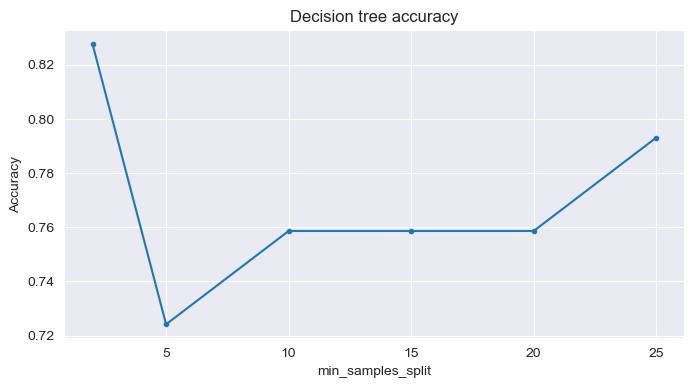

In [47]:
plot_min_split([2, 5, 10, 15, 20, 25])

The best accuracy is obtained at min_samples_split = 2.

Let's explore another hyperparameter, min_sample_leaf

In [48]:
# define a function to plot the accuracy of the model based on min_sample_leaf
def plot_min_leaf(min_samples_leaf):
    model_acc = []
    for n in min_samples_leaf:
        # train and fit a decision tree model
        dt_model = DecisionTreeClassifier(random_state=54, min_samples_leaf=n)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_test) # Predict on the test data
        accuracy = accuracy_score(y_test, y_pred)
        model_acc.append(accuracy)
    # create dictionary for model accuracy
    dict_ = {'min_samples_leaf': min_samples_leaf, 'Accuracy': model_acc} 
    df_accuracy = pd.DataFrame(dict_)

    # plot the accuracy of the model at different min_samples_leaf
    plt.figure(figsize=(8, 4))
    plt.plot(df_accuracy['min_samples_leaf'], df_accuracy['Accuracy'], marker = '.')    
    plt.xlabel('min_samples_leaf')
    plt.ylabel("Accuracy")
    plt.title("Decision tree accuracy")
    plt.show()

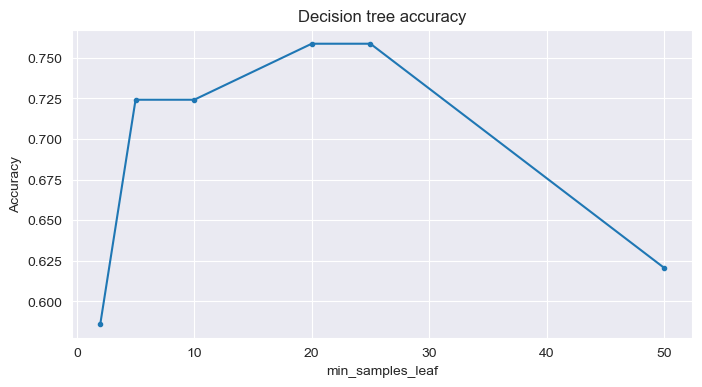

In [49]:
plot_min_leaf([2, 5, 10, 20, 25, 50])

The highest accuracy obtained is smaller compared to the baseline model, hence the hyperparameter, min_samples_leaf will be ignored.

The two hyperparameters that gave accuracy which is equal or greater the accuracy of the baseline model are **max_depth=5 and min_samples_split=2**. 

In [50]:
# final decision tree model
dt_model = DecisionTreeClassifier(random_state=54, 
                                  min_samples_split=2,
                                  max_depth=5)
dt_model.fit(X_train, y_train) # fit model on train data
y_pred = dt_model.predict(X_test) # Predict on the test data
accuracy = accuracy_score(y_test, y_pred) # calculate accuracy of the model
print("Accuracy:", accuracy)

Accuracy: 0.8275862068965517


Although, the accuracy obtained is the same as the one obtained from the baseline model (without hyperparameter tuning). However, we were able to explore the important hyperparameter suitable for the model.

### Hyperparameter tuning of KNN Classifier

The most important hyperparameter to tune in KNN classifier is number of neighbors. We will plot the accuracy of knn model at different values of n_neighbor to determine the b est number of neighbors to use.

In [51]:
# define a function to plot the accuracy of KNN model based on n_neighbors
def plot_n_neighbors(n_neighbors):
    model_acc = []
    for n in n_neighbors:
        # train and fit a decision tree model
        knn_model = KNeighborsClassifier(n_neighbors=n)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test) # Predict on the test data
        accuracy = accuracy_score(y_test, y_pred)
        model_acc.append(accuracy)
    # create dictionary for model accuracy
    dict_ = {'n_neighbors': n_neighbors, 'Accuracy': model_acc} 
    df_accuracy = pd.DataFrame(dict_)

    # plot the accuracy of the model at different min_samples_leaf
    plt.figure(figsize=(8, 4))
    plt.plot(df_accuracy['n_neighbors'], df_accuracy['Accuracy'], marker = '.')    
    plt.xlabel('n_neighbors')
    plt.ylabel("Accuracy")
    plt.title("KNN accuracy")
    plt.show()

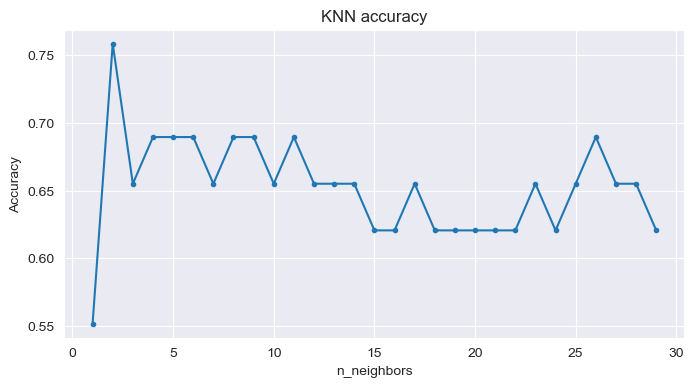

In [52]:
plot_n_neighbors(range(1,30))

Compared to the accuracy of the baseline model (0.689), the accuracy of the KNN model at n_neighbors=2 gives an accuracy greater than 0.75. 

Let's explore another parameter, leaf_size.

In [53]:
# define a function to plot the accuracy of the KNN model based on leaf_size
def plot_leaf_size(leaf_size):
    model_acc = []
    for n in leaf_size:
        # train and fit a decision tree model
        knn_model = KNeighborsClassifier(leaf_size=n)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test) # Predict on the test data
        accuracy = accuracy_score(y_test, y_pred)
        model_acc.append(accuracy)
    # create dictionary for model accuracy
    dict_ = {'leaf_size': leaf_size, 'Accuracy': model_acc} 
    df_accuracy = pd.DataFrame(dict_)

    # plot the accuracy of the model at different min_samples_leaf
    plt.figure(figsize=(8, 4))
    plt.plot(df_accuracy['leaf_size'], df_accuracy['Accuracy'], marker = '.')    
    plt.xlabel('leaf_size')
    plt.ylabel("Accuracy")
    plt.title("KNN accuracy")
    plt.show()

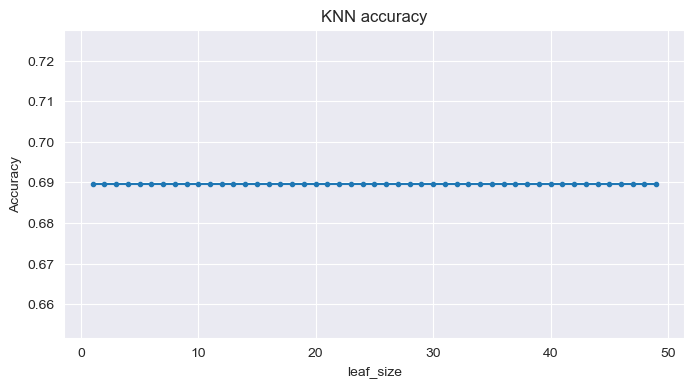

In [54]:
plot_leaf_size(range(1,50))

It was observed that the leaf size does not have any effect on the accuracy of the model. Therefore, we will be finalizing our KNN model using n_neighbor=2 as the only hyperparameter

In [55]:
# final KNN model
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train) # fit model on train data
y_pred = knn_clf.predict(X_test) # Predict on the test data
accuracy = accuracy_score(y_test, y_pred) # calculate accuracy of the model
print("Accuracy:", accuracy)

Accuracy: 0.7586206896551724


There is a notable improvement in the performance of the KNN model after tuning from the baseline accuracy of **68.9% to 75.8%** after tuning.

### Hyperparameter Tuning of XGboost Classifier

GradientBoostingClassifier can be tuned using its three hyperparameters; 'learning_rate', 'max_depth', and 'n_estimators'. We will make use of the GridSearchCV to determine the best combination for the three hyperparameters.

In [57]:
# Create an XGBoost classifier
xgb_clf = GradientBoostingClassifier(random_state=10)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

from sklearn import GridSearchCV
# Grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_result.best_params_)

# Use the best parameters to predict the test data
best_clf = grid_result.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ImportError: cannot import name 'GridSearchCV' from 'sklearn' (C:\Users\HP\anaconda3\Lib\site-packages\sklearn\__init__.py)

The accuracy of the model after hyperparameter tuning is the same as the accuracy obtained from the baseline model.

<a id='model_reeval'></a>

## Re-evaluation of Tuned Models

We will re-evaluate the performance of the classification models using the tuned classifiers.

### Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=54, 
                                  min_samples_split=2,
                                  max_depth=5) # tuned hyperparameters
dt_clf.fit(X_train, y_train) # fit model on train data
y_pred = dt_clf.predict(X_test) # Predict on the test data

dt_cf = confusion_matrix(y_test, y_pred) # confusion matrix

TP = dt_cf[1,1] # true positive
TN = dt_cf[0,0] # true negative
FP = dt_cf[1,0] # False positive
FN = dt_cf[0,1] # false negative

# determine the evaluation metrics

dt_accuracy = (TP+TN)/(TP+TN+FN+FP)
dt_sensitivity = TP / (TP + FN)
dt_specificity = TN / (TN + FP)
dt_precision = TP / (TP + FP)
dt_recall = TP / (TP + FN)

#use model to predict probability that given y value is 1
pred_proba = dt_model.predict_proba(X_test)[::,1]

#calculate AUC of model
from sklearn import metrics
dt_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
dt_metrics = [{'Accuracy': dt_accuracy, 'Sensitivity': dt_sensitivity, 'Specificity': dt_specificity,
                  'Precision': dt_precision, 'Recall': dt_recall, 'AUC': dt_auc}]
dt_metrics_df = pd.DataFrame.from_dict(dt_metrics) # convert the dictionary to dataframe
dt_metrics_df

### KNeighbors Classifier

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=2) # tuned hyperparameter
knn_clf.fit(X_train, y_train) # fit model on train data
y_pred = knn_clf.predict(X_test) # Predict on the test data

knn_cf = confusion_matrix(y_test, y_pred)

TP = knn_cf[1,1] # true positive
TN = knn_cf[0,0] # true negative
FP = knn_cf[1,0] # False positive
FN = knn_cf[0,1] # false negative

# determine the evaluation metrics
knn_accuracy = (TP+TN)/(TP+TN+FN+FP)
knn_sensitivity = TP / (TP + FN)
knn_specificity = TN / (TN + FP)
knn_precision = TP / (TP + FP)
knn_recall = TP / (TP + FN)

#use model to predict probability that given y value is 1
pred_proba = knn_clf.predict_proba(X_test)[::,1]

#calculate AUC of model
knn_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
knn_perf = [{'Accuracy': knn_accuracy, 'Sensitivity': knn_sensitivity, 'Specificity': knn_specificity,
                  'Precision': knn_precision, 'Recall': knn_recall, 'AUC': knn_auc}]
knn_perf_df = pd.DataFrame.from_dict(knn_perf) # convert the dictionary to dataframe
knn_perf_df

### Gradient Boost Classifier

In [ ]:
xgb_clf = GradientBoostingClassifier(random_state=10,
                                    learning_rate = 0.1, 
                                    max_depth = 3,
                                    n_estimators = 100) # tuned hyperparameters
xgb_clf.fit(X_train,y_train) # train model
y_pred = xgb_clf.predict(X_test) # predict model with test data

xgb_cf = confusion_matrix(y_test, y_pred) # confusion matrix

TP = xgb_cf[1,1] # true positive
TN = xgb_cf[0,0] # true negative
FP = xgb_cf[1,0] # False positive
FN = xgb_cf[0,1] # false negative

# determine the evaluation metrics
xgb_accuracy = (TP+TN)/(TP+TN+FN+FP)
xgb_sensitivity = TP / (TP + FN)
xgb_specificity = TN / (TN + FP)
xgb_precision = TP / (TP + FP)
xgb_recall = TP / (TP + FN)

#use model to predict probability that given y value is 1
pred_proba = xgb_clf.predict_proba(X_test)[::,1]

#calculate AUC of model
xgb_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
xgb_perf = [{'Accuracy': xgb_accuracy, 'Sensitivity': xgb_sensitivity, 'Specificity': xgb_specificity,
                  'Precision': xgb_precision, 'Recall': xgb_recall, 'AUC': xgb_auc}]
xgb_perf_df = pd.DataFrame.from_dict(xgb_perf) # convert the dictionary to dataframe
xgb_perf_df

<a id='model_comp'></a>

## Comparing Models Performance

In [ ]:
clfs = {'Classifiers': ['Decision Tree', 'KNeighbors Classifier', 'Gradient Boosting Classifier'], 
              'Accuracy': [dt_accuracy, knn_accuracy, xgb_accuracy],
              'Sensitivity': [dt_sensitivity, knn_sensitivity, xgb_sensitivity],
              'Specificity': [dt_specificity, knn_specificity, xgb_specificity],
              'Precision': [dt_precision, knn_precision, xgb_precision],
              'Recall': [dt_recall, knn_recall, xgb_recall], 
              'AUC': [dt_auc, knn_auc, xgb_auc]}

# convert the model_perf dictionary to dataframe
clfs = pd.DataFrame.from_dict(clfs)
clfs

### Conclusion

- In this project, three classifiers were developed to predict the grade of meningioma in patients with brain tumor.
- The three classification models are: Decision tree, Kneighbors classifier and Gradient Boosting
- Gradient boosting is the best classifier followed by decision tree. Kneighbors acheived the least accuaracy and other performance metrics of the three classifiers